#### Tokenization

In [52]:
text1 = 'She sells seashells by the seashore.'
text2 = '"Seashells! The seashells are on sale! By the seashore."'
text3 = 'She sells 3 seashells to John, who lives by the lake.'

words_lists = [text.split() for text in [text1, text2, text3]]
words1, words2, words3 = words_lists 

for i, words in enumerate(words_lists, 1):
  print(f'Words in text {i}')
  print(f'{words}\n')


Words in text 1
['She', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 2
['"Seashells!', 'The', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 3
['She', 'sells', '3', 'seashells', 'to', 'John,', 'who', 'lives', 'by', 'the', 'lake.']



#### cleaning and normalizing text

In [53]:
def simplify_text(text):
  for punctuation in ['.', '.', '!', '?', '"']:
    text = text.replace(punctuation, '')
    
  return text.lower() 

for i, words in enumerate(words_lists, 1):
  for j, word in enumerate(words):
    words[j] = simplify_text(word)
    
  print(f'Words in text {i}')
  print(f'{words}\n')

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 'sale', 'by', 'the', 'seashore']

Words in text 3
['she', 'sells', '3', 'seashells', 'to', 'john,', 'who', 'lives', 'by', 'the', 'lake']



#### Unique_Words

In [54]:
words_sets = [set(words) for words in words_lists]
for i, unique_words in enumerate(words_sets, 1):
  print(f'Unique Words in text {i}')
  print(f'{unique_words}\n')
  


Unique Words in text 1
{'seashore', 'sells', 'seashells', 'she', 'by', 'the'}

Unique Words in text 2
{'seashore', 'on', 'are', 'seashells', 'sale', 'by', 'the'}

Unique Words in text 3
{'the', 'lives', 'who', 'to', 'john,', '3', 'seashells', 'lake', 'she', 'by', 'sells'}



#### Extracting overlapping words between two texts

In [55]:
words_set1 = words_sets[0]
for i, words_set in enumerate(words_sets[1:], 2):
  shared_words = words_set1 & words_set 
  print(f'Texts 1 and {i} share these {len(shared_words)} words:')
  print(f'{shared_words}\n')

Texts 1 and 2 share these 4 words:
{'seashore', 'the', 'by', 'seashells'}

Texts 1 and 3 share these 5 words:
{'sells', 'seashells', 'she', 'by', 'the'}



Text 1 and 3 share more words that are similar, but also share diverging words

#### Extracting diverging words

In [56]:
for i, words_set in enumerate(words_sets[1:], 2):
  diverging_words = words_set1 ^ words_set 
  print(f"Texts 1 and {i} don't share these {len(diverging_words)} words:")
  print(f'{diverging_words}\n')
  

Texts 1 and 2 don't share these 5 words:
{'on', 'are', 'sale', 'she', 'sells'}

Texts 1 and 3 don't share these 7 words:
{'seashore', 'lives', 'who', 'to', 'john,', '3', 'lake'}



Text 1 and 3 contain more diverging words then text 1 and 2

#### Extracting the union of words between two texts

In [57]:
for i, words_set in enumerate(words_sets[1:], 2):
  total_words = words_set1 | words_set 
  print(f"Together, texts 1 and {i} contain {len(total_words)} "
        f"unique_words. These words are:\n {total_words}\n")

Together, texts 1 and 2 contain 9 unique_words. These words are:
 {'seashore', 'on', 'sells', 'are', 'seashells', 'sale', 'she', 'by', 'the'}

Together, texts 1 and 3 contain 12 unique_words. These words are:
 {'sells', 'seashore', 'lives', 'who', 'to', 'john,', '3', 'seashells', 'lake', 'she', 'by', 'the'}



#### Extracting the percentage of shared words between two texts

In [58]:
for i, words_set in enumerate(words_sets[1:], 2):
  shared_words = words_set1 & words_set 
  diverging_words = words_set1 ^ words_set 
  total_words = words_set1 | words_set 
  assert len(total_words) == len(shared_words) + len(diverging_words)
  percent_shared = 100 * len(shared_words) / len(total_words)
  percent_diverging = 100 * len(diverging_words) / len(total_words)
  
  print(f'Together, texts 1 and {i} contain {len(total_words)} '
        f'unique words. \n{percent_shared:.2f}% of these words are '
        f'shared. \n{percent_diverging:.2f}% of these words diverge.\n')

Together, texts 1 and 2 contain 9 unique words. 
44.44% of these words are shared. 
55.56% of these words diverge.

Together, texts 1 and 3 contain 12 unique words. 
41.67% of these words are shared. 
58.33% of these words diverge.



### Text Similarity with Jaccard similarity

The Jaccard similarity is a reasonable measure of text resemblance for the following reasons:
- The similarity takes into account both text overlap and text divergence. 
- The fractional similarity is always between 0 and 1. The fraction is easy to interpret: 0 indicates no words are share, 0.5 indicates that half the words are shared, and 1 indicates that all the words are shared. 
- The similarity is simple to implement.

1. Given two texts, extract a list of words from each text 
2. Count the unque words that are shared between the texts. 
3. Divide the shared word count by the total unique words across both texts

#### Computing the Jaccard similarity


In [59]:
def jaccard_similarity(text_a, text_b):
  word_set_a, word_set_b = [set(simplify_text(text).split()) for text in [text_a, text_b]]
  num_shared = len(word_set_a & word_set_b)
  num_total = len(word_set_a) + len(word_set_b) - num_shared 
  return num_shared / num_total 

for text in [text2, text3]:
  similarity = jaccard_similarity(text1, text)
  print(similarity)
  # assert similarity == jaccard_similarity(text1, text)

0.4444444444444444
0.4166666666666667


#### Replacing words to numbers in vocabulary

In [60]:
words_set1, words_set2, words_set3 = words_sets 
total_words = words_set1 | words_set2 | words_set3 
vocabulary = {word: i for i, word in enumerate(total_words)}
value_to_word = {value: word for word, value in vocabulary.items()}
print(f'OUr vocabulary contains {len(vocabulary)} words. '
      f'This vocabulary is: \n{vocabulary}')

OUr vocabulary contains 15 words. This vocabulary is: 
{'on': 0, 'sale': 1, 'sells': 2, 'seashore': 3, 'lives': 4, 'who': 5, 'to': 6, 'john,': 7, 'are': 8, '3': 9, 'seashells': 10, 'lake': 11, 'she': 12, 'by': 13, 'the': 14}


### Transforming words into binary vectors 

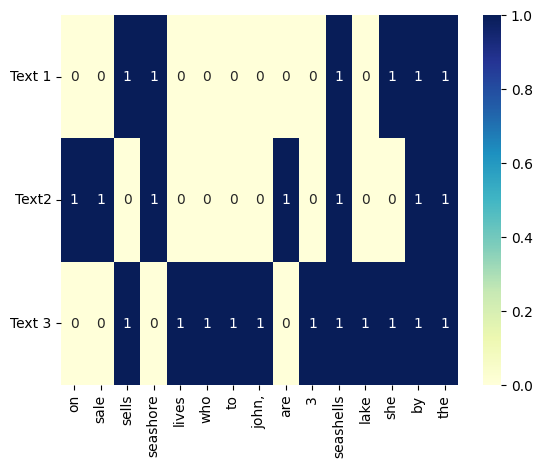

In [61]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

vectors = [] 
for i, words_set in enumerate(words_sets, 1):
  vector = np.array([0] * len(vocabulary))
  for word in words_set: 
    vector[vocabulary[word]] = 1
  vectors.append(vector)
sns.heatmap(vectors, annot=True, cmap='YlGnBu', xticklabels=vocabulary.keys(),
            yticklabels=['Text 1', 'Text2', 'Text 3'])
plt.yticks(rotation=0)
plt.show()

### Finding shared words using vector arithmetic 

In [62]:
vector1, vector2 = vectors[:2]
for i in range(len(vocabulary)):
  if vector1[i] * vector2[i]:
    shared_word = value_to_word[i]
    print(f"'{shared_word}' is present in both texts 1 and 2")

'seashore' is present in both texts 1 and 2
'seashells' is present in both texts 1 and 2
'by' is present in both texts 1 and 2
'the' is present in both texts 1 and 2


#### Counting shared words using vector arithmetic 

In [63]:
shared_word_count = sum(vector1[i] * vector2[i] for i in range(len(vocabulary))) 
print(shared_word_count)
print(len(words_set1 & words_set2))
assert shared_word_count == len(words_set1 & words_set2)

4
4


#### Computing a vector dot product using numpy

In [64]:
assert vector1.dot(vector2) == shared_word_count
assert vector1 @ vector2 == shared_word_count

#### Counting total words using vector arithmetic

In [65]:
assert vector1 @ vector1 == len(words_set1)
assert vector2 @ vector2 == len(words_set2)

#### Tanimoto similarity is Jaccard similarity using only vector operations

In [66]:
def tanimoto_similarity(vector_a, vector_b):
  num_shared = vector_a @ vector_b
  num_total = vector_a @ vector_a + vector_b @ vector_b - num_shared
  return num_shared / num_total 

for i, text in enumerate([text2, text3], 1):
  similarity = tanimoto_similarity(vector1, vectors[i])
  assert similarity == jaccard_similarity(text1, text)

#### Computing the similarity of non-binary vectors 

we can use non-binary inputs to calculate tanimoto_similarity

In [67]:
non_binary_vector1 = np.array([5, 3])
non_binary_vector2 = np.array([5, 2])
similarity = tanimoto_similarity(non_binary_vector1, non_binary_vector2)
print(f'The similarity of 2 non-binary vectors is {similarity}')

The similarity of 2 non-binary vectors is 0.96875


#### Computing TF vector similarity 

In [68]:
# computing similarity between Term Frequency vector and binary vector
# in one text word duck mentioned 61 times and goose 2, in 2nd text duck mentioned 1 and goose 71

similarity = tanimoto_similarity(np.array([61, 2]), np.array([1, 71])) 
print(f'The similarity between texts is approximately {similarity: .3f}')

similarity = tanimoto_similarity(np.array([1, 1,]), np.array([1, 1]))
print(f'The similarity between texts is approximately {similarity: .3f}')


The similarity between texts is approximately  0.024
The similarity between texts is approximately  1.000


#### Compupting TF vectors from word lists 

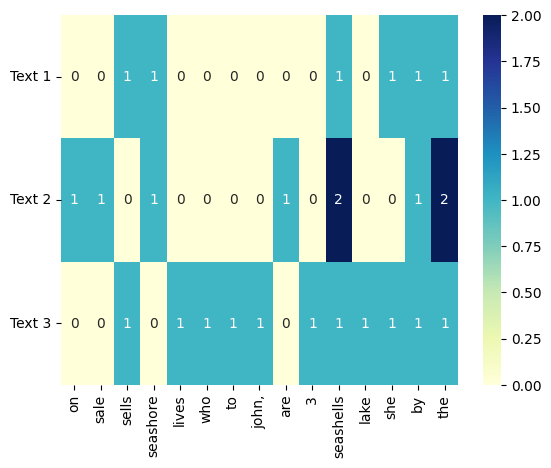

In [70]:
tf_vectors = [] 
for i, words_list in enumerate(words_lists, 1):
  tf_vector = np.array([0] * len(vocabulary))
  for word in words_list: 
    word_index = vocabulary[word]
    tf_vector[word_index] += 1
  tf_vectors.append(tf_vector)
  
sns.heatmap(tf_vectors, cmap='YlGnBu', annot=True,
            xticklabels=vocabulary.keys(),
            yticklabels=['Text 1', 'Text 2', 'Text 3'])
plt.yticks(rotation=0)
plt.show()
  

#### Comparing metrics of vector similarity 

- Using TF increases the sensitivity of the similarity score, compared to binary
- However TF can also be detrimental when comparing texts of different lengths. 
- We need to apply normalization to mitigate this.

In [71]:
tf_vector1 = tf_vectors[0]
binary_vector1 = vectors[0]

for i, tf_vector in enumerate(tf_vectors[1:], 2):
  similarity = tanimoto_similarity(tf_vector1, tf_vector)
  old_similarity = tanimoto_similarity(binary_vector1, vectors[i - 1])
  print(f'The recomputed Tanimoto similaritybetween texts 1 and {i} is {similarity:.4f}')
  print(f'Previously, that similarity equaled {old_similarity:.4f}' '\n')

The recomputed Tanimoto similaritybetween texts 1 and 2 is 0.4615
Previously, that similarity equaled 0.4444

The recomputed Tanimoto similaritybetween texts 1 and 3 is 0.4167
Previously, that similarity equaled 0.4167



#### Using normalization to improve TF vector similarity 

In [72]:
query_vector = np.array([1, 1])
title_a_vector = np.array([3, 3])
title_b_vector = np.array([1, 0])

#### Ranking titles by query similarity

Most data scientist would say title A, would be a better match, but as we can see it's not, the discrepency is due to text size

In [73]:
titles = ['A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!', 
          'B: Pepperoni']
title_vectors = [title_a_vector, title_b_vector]
similarities = [tanimoto_similarity(query_vector, title_vector) for title_vector in title_vectors]

for index in sorted(range(len(titles)), key=lambda i: similarities[i], reverse=True):
  title = titles[index]
  similarity = similarities[index]
  print(f"'{title}' has a query similarity of {similarity:.4f}")

'B: Pepperoni' has a query similarity of 0.5000
'A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!' has a query similarity of 0.4286


#### Eliminating size differences through division 

In [74]:
assert np.array_equal(query_vector, title_a_vector / 3)
assert tanimoto_similarity(query_vector, title_a_vector / 3) == 1

#### Plotting TF vectors in 2D space 

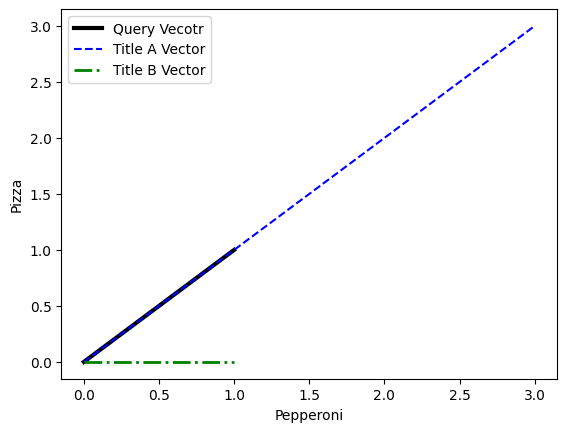

In [76]:
plt.plot([0, query_vector[0]], [0, query_vector[1]], c='k', linewidth=3, label='Query Vecotr')
plt.plot([0, title_a_vector[0]], [0, title_a_vector[1]], c='b', 
         linestyle='--', label='Title A Vector')
plt.plot([0, title_b_vector[0]], [0, title_b_vector[1]], c='g', 
         linewidth=2, linestyle='-.', label='Title B Vector')
plt.xlabel('Pepperoni')
plt.ylabel('Pizza')
plt.legend()
plt.show()

In our plot, title_a_vecotr and query_vector point in the same direction. The only difference between the two <br>
lines is that title_a_vector is 3 times as long. Shrinking title_a_vector wil lfor the two lines to be identiical.

#### Computing vector magnitude

In [79]:
from scipy.spatial.distance import euclidean 
from numpy.linalg import norm

vector_names = ['Query Vector', 'Title A Vector', 'Title B Vector']
tf_search_vectors = [query_vector, title_a_vector, title_b_vector]
origin = np.array([0, 0])
for name, tf_vector in zip(vector_names, tf_search_vectors):
  magnitude = euclidean(tf_vector, origin) # magnitude equals euclidean distance between vector and origin
  assert magnitude == norm(tf_vector)     # np norm returns the magnitude
  assert magnitude == (tf_vector @ tf_vector) ** 0.5 # magnitude can also be computed using dot product
  print(f"{name}'s magnitude is approximately {magnitude:.4f}")
  
magnitude_ration = norm(title_a_vector) / norm(query_vector)
print(f'\nVector A is {magnitude_ration:.0f}x as long as Query Vector')

Query Vector's magnitude is approximately 1.4142
Title A Vector's magnitude is approximately 4.2426
Title B Vector's magnitude is approximately 1.0000

Vector A is 3x as long as Query Vector


- Divding any vector by its magnitude transforms that magnitude to 1.
- That division is called normalization, magnitude is also referenced as L@ norm
- Running v / norm(v) returns a nromalized vector with a magnitude of 1

#### Plotting normalized vectors

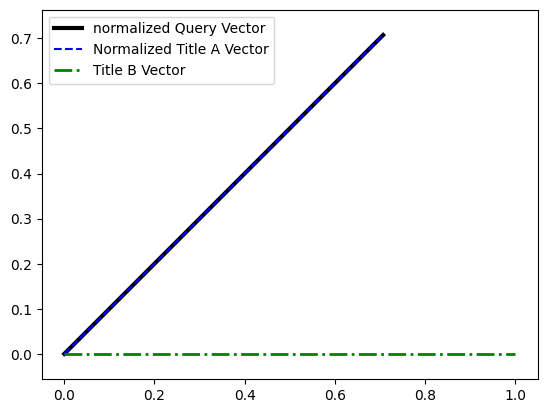

In [80]:
unit_query_vector = query_vector / norm(query_vector)
unit_title_a_vector = title_a_vector / norm(title_a_vector)
assert np.allclose(unit_query_vector, unit_title_a_vector) # two nromalized unit vectos are now identical, use np.allclose to confirm
unit_title_b_vector = title_b_vector # Already a unit vector no need to normalize

plt.plot([0, unit_query_vector[0]], [0, unit_query_vector[1]], c='k',
         linewidth=3, label="normalized Query Vector")
plt.plot([0, unit_title_a_vector[0]], [0, unit_title_a_vector[1]], c='b',
         linestyle='--', label='Normalized Title A Vector')
plt.plot([0, unit_title_b_vector[0]], [0, unit_title_b_vector[1]], c='g', 
         linewidth=2, linestyle='-.', label='Title B Vector')
plt.axis('equal')
plt.legend()
plt.show()

#### Ranking title by unit vector similarity

In [81]:
unit_title_vectors = [unit_title_a_vector, unit_title_b_vector]
similarities = [tanimoto_similarity(unit_query_vector, unit_title_vector)
                for unit_title_vector in unit_title_vectors]

for index in sorted(range(len(titles)), key=lambda i: similarities[i], reverse=True):
  title = titles[index]
  similarity = similarities[index]
  print(f"'{title}' has a normalized query similarity of {similarity:.4f}")


'A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!' has a normalized query similarity of 1.0000
'B: Pepperoni' has a normalized query similarity of 0.5469


#### Computing a unit vector Tanimoto similarity 

In [82]:
def normalized_tanimoto(u1, u2):
  dot_product = u1 @ u2 
  return dot_product / (2 - dot_product)

for unit_title_vector in unit_title_vectors[1:]:
  similarity = normalized_tanimoto(unit_query_vector, unit_title_vector)
  assert similarity == tanimoto_similarity(unit_query_vector, unit_title_vector)

#### converting between unit vector metrics 

In [84]:
unit_vector_names = ['Normalized Title A vector', 'Title B Vecotr']
u1 = unit_query_vector 

for unit_vector_name, u2 in zip(unit_vector_names, unit_title_vectors):
  similarity = normalized_tanimoto(u1, u2)
  cosine_similarity = 2 * similarity / (1 + similarity)
  assert cosine_similarity == u1 @ u2
  angle = np.arccos(cosine_similarity)
  euclidean_distance = (2 - 2 * cosine_similarity) ** 0.5 
  assert round(euclidean_distance, 10) == round(euclidean(u1, u2), 10)
  measurements = {'Tanimoto similarity': similarity, 
                  'cosine similarity': cosine_similarity, 
                  'Euclidean distance': euclidean_distance, 
                  'angle': np.degrees(angle)}
  
  print(f'We are comparing Normlaized Query Vector and {unit_vector_name}')
  for measurement_type, value in measurements.items():
    output = f'The {measurement_type} between vectors is {value:.4f}'
    if measurement_type == 'angle':
      output += ' degress\n'
      
    print(output)

We are comparing Normlaized Query Vector and Normalized Title A vector
The Tanimoto similarity between vectors is 1.0000
The cosine similarity between vectors is 1.0000
The Euclidean distance between vectors is 0.0000
The angle between vectors is 0.0000 degress

We are comparing Normlaized Query Vector and Title B Vecotr
The Tanimoto similarity between vectors is 0.5469
The cosine similarity between vectors is 0.7071
The Euclidean distance between vectors is 0.7654
The angle between vectors is 45.0000 degress



The Tanimoto similarity between normalized vectors can be transformed into other metrics of similarity or distance.<br>
This is useful for the following reasons:
- Swapping the tanimoto similarity for Euclidean distance allows us to carry out K-means clustering on text data.
- Swapping the Tanimoto similarity for cosine similarity simplifies our compuational requirements. All our compputations are reduced to basic dot product operations


NLP practioners use the cosine similarity instead of the Tanimoto similarity. Research shows that in the long term, the Tanimoto similarity is more accurate than the cosine similarity. However in many practical applications, the two similarities are interchangeagble


**Common unit vector comparisons metrics**
- u1 @ u2 - The cosine of the angle between unit vectos u1 and u2 
- (u1 @ u2) / (2 - u1 @ u2) - the Tanimotor similarity between unit vectors u1 and u2 
- (2 -2 * u1 @ u2) ** 0.5 - The Euclidean distance between unit vectors u1 and u2


Benefits of vector normalization 
- Swap between multiple comparison metrics 
- Elimination of text length as a differentiating signal. Let's us compare long and short texts with similar contents. 
- More efficient Tanimoto similarity computation - Only a single dot product operation 
- More efficient compuation of the similarity between every pair of vectors - This is called all-by-all similarity

#### Computing a table of normalized Tanimoto similarities 

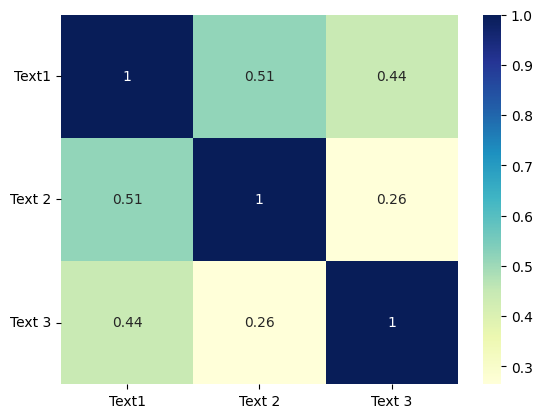

In [85]:
num_texts = len(tf_vectors)
similarities = np.array([[0.0] * num_texts for _ in range(num_texts)])
unit_vectors = np.array([vector / norm(vector) for vector in tf_vectors])
for i, vector_a in enumerate(unit_vectors): 
  for j, vector_b in enumerate(unit_vectors):
    similarities[i][j] = normalized_tanimoto(vector_a, vector_b)
    
labels = ['Text1', 'Text 2', 'Text 3']
sns.heatmap(similarities, cmap='YlGnBu', annot=True, 
            xticklabels=labels, yticklabels=labels)
plt.yticks(rotation=0)
plt.show()

#### Comparing Pandas and NumPy matrix attributes 

In [87]:
import pandas as pd 

matrices = [unit_vectors, pd.DataFrame(unit_vectors)]
matrix_types = ['2D NumPy array', 'Pandas DataFrame']

for matrix_type, matrix in zip(matrix_types, matrices): 
  row_count, column_count = matrix.shape
  print(f'Our {matrix_type} contains {row_count} rows and {column_count} columns')
  assert (column_count, row_count) == matrix.T.shape 

Our 2D NumPy array contains 3 rows and 15 columns
Our Pandas DataFrame contains 3 rows and 15 columns


#### NumPy array addition and subtraction 


In [89]:
double_similarities = 2 * similarities 
np.array_equal(double_similarities, similarities + similarities) 
zero_matrix = similarities - similarities  
negative_1_matrix = similarities - similarities - 1 

for i in range(similarities.shape[0]): 
  for j in range(similarities.shape[1]): 
    assert double_similarities[i][j] == 2 * similarities[i][j] 
    assert zero_matrix[i][j] == 0 
    assert negative_1_matrix[i][j] == -1

#### NumPy array multiplication and division

In [90]:
squared_similarities = similarities * similarities 
assert np.array_equal(squared_similarities, similarities ** 2) 
ones_matrix = similarities / similarities 
for i in range(similarities.shape[0]): 
  for j in range(similarities.shape[1]):
    assert squared_similarities[i][j] == similarities[i][j] ** 2 
    assert ones_matrix[i][j] == 1

#### Converting between matrix similarity-types

In [91]:
cosine_similarities = 2 * similarities / (1 + similarities) 
for i in range(similarities.shape[0]): 
  for j in range(similarities.shape[1]): 
    cosine_sim = unit_vectors[i] @ unit_vectors[j]
    assert round(cosine_similarities[i][j], 15) == round(cosine_sim, 15)

#### Accessing NumPy matrix rows and columns

In [93]:
for name, matrix in [('Similarities', similarities), 
                     ('Unit Vectors', unit_vectors)]: 
  print(f"Accessing rows and columns in the {name} Matrix.") 
  row, column = matrix[0], matrix[:,0] 
  print(f"Row at index 0 is:\n{row}") 
  print(f"\nColumn at index 0 is:\n{column}\n")

Accessing rows and columns in the Similarities Matrix.
Row at index 0 is:
[1.         0.51442439 0.44452044]

Column at index 0 is:
[1.         0.51442439 0.44452044]

Accessing rows and columns in the Unit Vectors Matrix.
Row at index 0 is:
[0.         0.         0.40824829 0.40824829 0.         0.
 0.         0.         0.         0.         0.40824829 0.
 0.40824829 0.40824829 0.40824829]

Column at index 0 is:
[0.        0.2773501 0.       ]



#### Comuting the dot product between a row and a column

In [94]:
row = similarities[0] 
column = unit_vectors[:,0] 
dot_product = row @ column 
print(f"The dot product between the row and column is: {dot_product:.4f}")

The dot product between the row and column is: 0.1427


#### Comuting dot proudct between all rows and columns

In [95]:
num_rows = similarities.shape[0] 
num_columns = unit_vectors.shape[1] 
for i in range(num_rows): 
  for j in range(num_columns): 
    row = similarities[i] 
    column = unit_vectors[:,j] 
    dot_product = row @ column 
    print(f"The dot product between row {i} column {j} is: " f"{dot_product:.4f}")

The dot product between row 0 column 0 is: 0.1427
The dot product between row 0 column 1 is: 0.1427
The dot product between row 0 column 2 is: 0.5423
The dot product between row 0 column 3 is: 0.5509
The dot product between row 0 column 4 is: 0.1340
The dot product between row 0 column 5 is: 0.1340
The dot product between row 0 column 6 is: 0.1340
The dot product between row 0 column 7 is: 0.1340
The dot product between row 0 column 8 is: 0.1427
The dot product between row 0 column 9 is: 0.1340
The dot product between row 0 column 10 is: 0.8276
The dot product between row 0 column 11 is: 0.1340
The dot product between row 0 column 12 is: 0.5423
The dot product between row 0 column 13 is: 0.6850
The dot product between row 0 column 14 is: 0.8276
The dot product between row 1 column 0 is: 0.2774
The dot product between row 1 column 1 is: 0.2774
The dot product between row 1 column 2 is: 0.2897
The dot product between row 1 column 3 is: 0.4874
The dot product between row 1 column 4 is: 0.

#### Storing all-by-all dot products in a matrix

In [96]:
dot_products = np.zeros((num_rows, num_columns)) 
for i in range(num_rows):
  for j in range(num_columns): 
    dot_products[i][j] = similarities[i] @ unit_vectors[:,j] 
    print(dot_products)

[[0.14267565 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
[[0.14267565 0.14267565 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
[[0.14267565 0.14267565 0.54227624 0.         0.         0.
  

#### Comuting a matrix product using NumPy

In [97]:
matrix_product = similarities @ unit_vectors 
assert np.allclose(matrix_product, dot_products)

#### Computing an erroneous matrix product

In [98]:
try:
  matrix_product = unit_vectors @ similarities 
except: 
  print("We can't compute the matrix product")


We can't compute the matrix product


#### Running matrix multiplication using matmul

In [105]:
matrix_product = np.matmul(similarities, unit_vectors) 
assert np.array_equal(matrix_product, similarities @ unit_vectors)

#### Comparing matrix product running times

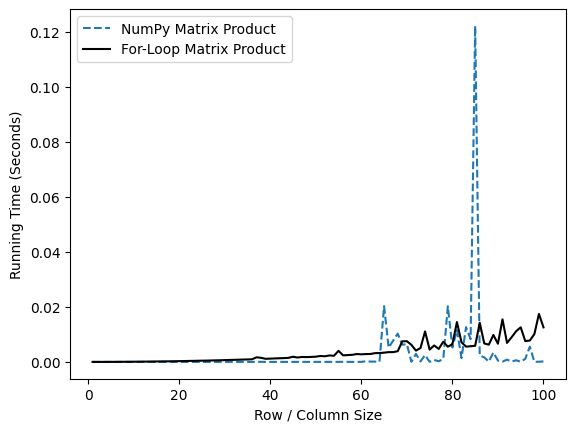

In [104]:
import time 
numpy_run_times = [] 
for_loop_run_times = []

matrix_sizes = range(1, 101) 

for size in matrix_sizes: 
  matrix = np.ones((size, size)) 
  start_time = time.time() 
  matrix @ matrix 
  numpy_run_times.append(time.time() - start_time) 
  start_time = time.time() 
  for i in range(size): 
    for j in range(size): 
      matrix[i] @ matrix[:,j] 
  for_loop_run_times.append(time.time() - start_time) 
plt.plot(matrix_sizes, numpy_run_times, label='NumPy Matrix Product', linestyle='--') 
plt.plot(matrix_sizes, for_loop_run_times, label='For-Loop Matrix Product', color='k') 
plt.xlabel('Row / Column Size') 
plt.ylabel('Running Time (Seconds)')
plt.legend() 
plt.show()

#### Obtaining cosines from a matrix product

In [103]:
cosine_matrix = unit_vectors @ unit_vectors.T 
assert np.allclose(cosine_matrix, cosine_similarities)

#### Converting cosines to a Tanimoto matrix

In [106]:
tanimoto_matrix = cosine_matrix / (2 - cosine_matrix) 
assert np.allclose(tanimoto_matrix, similarities)

#### Inputting matrices into normalized_tanimoto

In [107]:
output = normalized_tanimoto(unit_vectors, unit_vectors.T) 
assert np.array_equal(output, tanimoto_matrix)


#### Timing an all-by-all comparison of 30 novels

In [108]:
vocabulary_size = 50000 
normalized_vector = [1 / vocabulary_size] * vocabulary_size 
book_count = 30 

def measure_run_time(book_count): 
  book_matrix = np.array([normalized_vector] * book_count)
  start_time = time.time() 
  normalized_tanimoto(book_matrix, book_matrix.T) 
  return time.time() - start_time
run_time = measure_run_time(book_count) 
print(f"It took {run_time:.4f} seconds to compute the similarities across a " f"{book_count}-book by {vocabulary_size}-word matrix")


It took 0.0048 seconds to compute the similarities across a 30-book by 50000-word matrix


#### Plotting book counts vs. running times

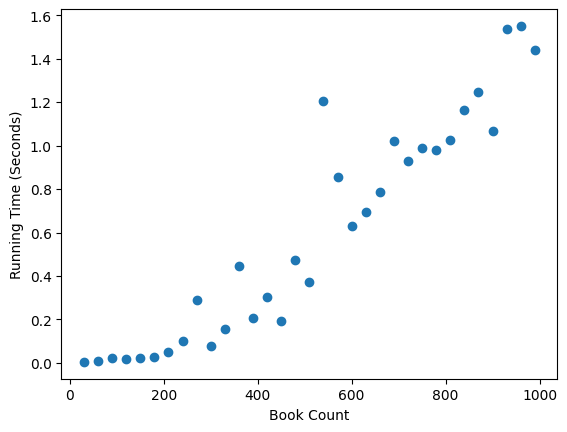

In [109]:
book_counts = range(30, 1000, 30) 
run_times = [measure_run_time(book_count) 
             for book_count in book_counts] 
plt.scatter(book_counts, run_times) 
plt.xlabel('Book Count') 
plt.ylabel('Running Time (Seconds)') 
plt.show()

#### Modelling running times using a quadratic curve

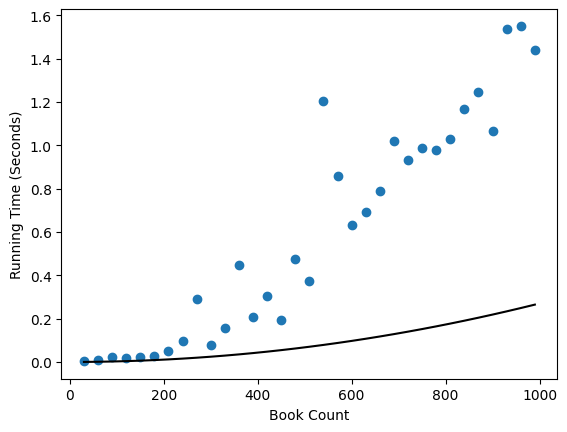

In [111]:
def y(x): return (0.27 / (1000 ** 2)) * (x ** 2) 
plt.scatter(book_counts, run_times) 
plt.plot(book_counts, y(np.array(book_counts)), c='k') 
plt.xlabel('Book Count') 
plt.ylabel('Running Time (Seconds)') 
plt.show()

#### Predicting the running time for 300000 books

In [112]:
book_count = 300000 
run_time = y(book_count) / 3600 
print(f"It will take {run_time} hours to compute all-by-all similarities " 
      f"from a {book_count}-book by {vocabulary_size}-word matrix")

It will take 6.75 hours to compute all-by-all similarities from a 300000-book by 50000-word matrix
